**심부전(HeartFailure) 예측하기**

출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data?select=heart_failure_clinical_records_dataset.csv
*   **age** : 나이 
*   **anaemia** : 빈혈 (0: 정상, 1: 빈혈)
*   **creatinine_phosphokinase** : 크레아틴키나제(혈청cpk) 검사 수치
*   **diabetes** : 당뇨 (0: 정상, 1: 당뇨)
*   **ejection_fraction** : 심박출률 => 심장의 펌프기능을 나타내는 지표
*   **high_blood_pressure** : 고혈압 (0: 정상, 1: 고혈압)
*   **platelets** : 혈소판 수치 
*   **serum_creatinine** : 혈중 크레아틴 수치 (mg/dL)
*   **serum_sodium** : 혈중 나트륨 수치 (mg/dL)
*   **sex** : 성별 (0: 여성, 1: 남성)
*   **smoking** : 흡연 여부 (0: 비흡연, 1: 흡연)
*   **time** : 관찰 기간 (일)
*   **DEATH_EVENT** : 사망 여부 (0: 생존, 1: 사망)



---



**(1) 기본 설정하기**

In [1]:
# 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
# 필요한 모듈 삽입(1)
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [3]:
# 필요한 모듈 삽입(2)
import numpy as np 
import pandas as pd 
import seaborn as sns
import missingno as msno



---



**(2) 데이터 확인**

In [4]:
# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/Heart_Failure/heart_failure_clinical_records.csv')
display(df.head(2),df.tail(2))

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [5]:
# column명 확인 
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
# 데이터프레임 정보 확인 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


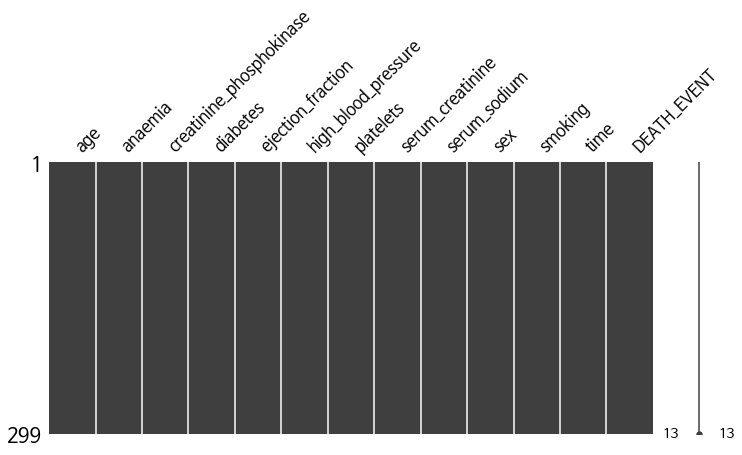

In [7]:
# 결측값 시각화하기 => missingno 사용 
msno.matrix(df, figsize=(12,5)) # 결측값 없음 

In [8]:
# 수치형 데이터의 통계를 확인 
# creatinine_phosphokinase의 max값이 평균에 비하여 약 13배 정도 차이가 난다. => 확인 필요
# serum_creatinine의 max값이 평균에 비하여 약 9배 정도 차이가 난다. => 확인 필요
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


---

**(3) 데이터 스케일링: StandardScaler로 전처리하고 XGBoost 모델 생성/학습하기**





* StandardScaler이란?

각 특성의 평균을 0, 분산을 1로 스케일링하여 데이터를 정규 분포로 만드는 역할. => 수치형 데이터만 처리 가능 <br> (평균을 제거하고 단위 분산으로 스케일링)

*   XGBoost란? <br>
Gradient Boosting 알고리즘을 분산환경에서도 실행할 수 있도록 구현해놓은 라이브러리



In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# StandardScaler를 이용하여 수치형 데이터만 전처리하기

# 수치형 데이터 => 관찰기간(time)은 제거
num_column = df[['age', 'creatinine_phosphokinase', 'ejection_fraction','platelets','serum_creatinine','serum_sodium']]

# 범주형 데이터
category_column = df[['anaemia', 'diabetes','high_blood_pressure','sex', 'smoking']]

y= df[['DEATH_EVENT']]

In [10]:
# 수치형 데이터를 StandardScaler에 전달하고, transform()을 이용하여 객체를 반환한다. 
scaler.fit(num_column)
num_column_scale = scaler.transform(num_column)
num_column_scale

array([[ 1.19294523e+00,  1.65728387e-04, -1.53055953e+00,
         1.68164843e-02,  4.90056987e-01, -1.50403612e+00],
       [-4.91279276e-01,  7.51463953e+00, -7.07675018e-03,
         7.53566018e-09, -2.84552352e-01, -1.41976151e-01],
       [ 3.50832977e-01, -4.49938761e-01, -1.53055953e+00,
        -1.03807313e+00, -9.09000174e-02, -1.73104612e+00],
       ...,
       [-1.33339153e+00,  1.52597865e+00,  1.85495776e+00,
         4.90208200e+00, -5.75030855e-01,  3.12043840e-01],
       [-1.33339153e+00,  1.89039811e+00, -7.07675018e-03,
        -1.26338936e+00,  5.92615005e-03,  7.66063830e-01],
       [-9.12335403e-01, -3.98321274e-01,  5.85388775e-01,
         1.34823057e+00,  1.99578485e-01, -1.41976151e-01]])

In [11]:
# 다시 데이터 프레임 형식으로 변환
num_column_scale = pd.DataFrame(data=num_column_scale, index=num_column.index, columns=num_column.columns)
display(num_column_scale.head(2),num_column_scale.tail(2))

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
297,-1.333392,1.890398,-0.007077,-1.263389,0.005926,0.766064
298,-0.912335,-0.398321,0.585389,1.348231,0.199578,-0.141976


In [12]:
# 수치형 데이터 오른쪽에 범주형 데이터를 붙여 통합하기 => concat
scale_concat = pd.concat([num_column_scale, category_column],axis=1)
display(scale_concat.head(2),scale_concat.tail(2))

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
297,-1.333392,1.890398,-0.007077,-1.263389,0.005926,0.766064,0,0,0,1,1
298,-0.912335,-0.398321,0.585389,1.348231,0.199578,-0.141976,0,0,0,1,1


**<머신러닝 모델 학습하기>** <br>
<br>전처리한 데이터를 **학습(Training)데이터**와 **테스트(test)데이터**로 분할해야 한다. 

다양한 기계학습과 데이터 분석 툴을 제공하는 scikit_learn 패키지의 model_selection에서 **train_test_split** 함수를 사용.

**train_test_split** (arrays, test_size, train_size, random_state, shuffle, stratify) <br>
- arrays : 분할시킬 데이터를 입력
- test_size : 테스트 데이터의 비율 (default = 0.25)
- train_size : 학습 데이터의 비율
- random_state : 데이터 분할 시, 셔플을 위한 시드값
- shuffle : 셔플 여부 결정 
- stratify : 지정한 데이터의 비율 유지 여부




In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scale_concat, y , test_size=0.3, random_state=1, shuffle=False)
# 학습데이터 약 70% 약 209개
X_train 

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
204,1.445579,-0.534591,0.162199,1.397162e-01,-0.671857,0.085034,1,0,0,1,1
205,-0.912335,-0.428259,0.585389,1.010256e+00,-0.381379,-0.141976,1,1,0,0,0
206,-1.754448,-0.496394,0.162199,-3.826077e-01,-0.575031,0.993074,1,0,0,0,0
207,2.035057,-0.381804,-0.007077,-7.922736e-01,-0.478205,-0.141976,0,0,0,1,0


In [14]:
# XGBClassifier 모델 생성하고 학습하기
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

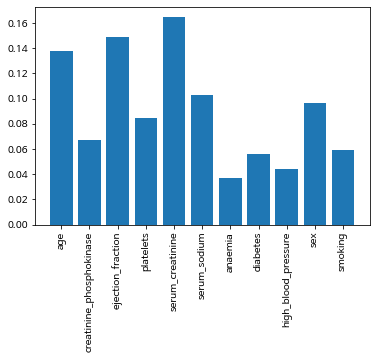

In [15]:
# XGBClassifier 모델을 이용하여 각 컬럼의 중요도 평가 
plt.bar(scale_concat.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

**나이, 심박출률, 혈중 크레아틴 수치가 중요한 요인으로 작용한다는 것을 학습을 통해 알 수 있다.**



---



**(4) 나이 컬럼 분석**

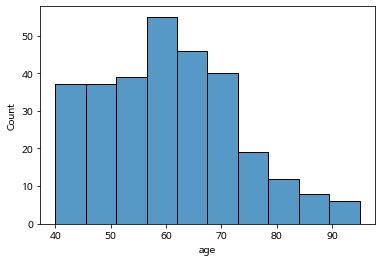

In [16]:
# 나이 현황을 히스토그램으로 출력 => 40대 부터 90대 까지 존재
sns.histplot(x='age', data=df)

In [17]:
# 나이를 연령별로 나누기 => for문 이용 
age_spec = []

for a in df.age:
    ten = a // 10
    if ten == 0:
        age_spec.append('0~9')
    elif ten >= 9:
        age_spec.append('90~')
    else:
        # ten이 1.0, 2.0 이런식으로 나오지 않도록 int형으로 설정 
        age_spec.append('{}0~{}9'.format(int(ten), int(ten)))

In [18]:
# age_spec을 df의 age_spec 이라는 열로 추가
df['age_spec'] = age_spec
display(df.head(2),df.tail(2))

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_spec
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,70~79
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,50~59


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_spec
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0,40~49
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0,50~59


In [19]:
# 나이에 따른 사망율 그래프 출력 => age_spec 컬럼과 DEATH_EVENT컬럼만 추출
age_survived = df[["age_spec", "DEATH_EVENT"]]
display(age_survived.head(2), age_survived.tail(2))

,age_spec,DEATH_EVENT
0,70~79,1
1,50~59,1


,age_spec,DEATH_EVENT
297,40~49,0
298,50~59,0


In [20]:
# 문자형인 DEATH_EVENT컬럼 숫자형으로 변경
age_survived["DEATH_EVENT"] = pd.to_numeric(age_survived["DEATH_EVENT"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
# 나이별 평균 구하기 => age_spec으로 정렬하고 DEATH_EVENT컬럼에는 평균함수(mean)을 적용(agg) => index초기화
age_survived_mean = age_survived.groupby("age_spec").agg({"DEATH_EVENT": "mean"}).reset_index()
display(age_survived_mean.head(2),age_survived_mean.tail(2))

,age_spec,DEATH_EVENT
0,40~49,0.234043
1,50~59,0.243902


,age_spec,DEATH_EVENT
4,80~89,0.684211
5,90~,0.833333


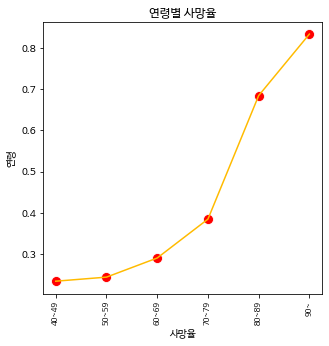

In [22]:
# 연령별 사망율 그래프 그리기 
f, ax = plt.subplots(1, 1, figsize=(5,5))
sns.lineplot(x="age_spec", y="DEATH_EVENT", data=age_survived_mean, color="#FFBB00", ax=ax);
sns.scatterplot(x="age_spec", y="DEATH_EVENT", data=age_survived_mean, s=100, color="#FF0000", ax=ax)
ax.set_title("연령별 사망율")
ax.set_xlabel("사망율")
ax.set_ylabel("연령")
plt.xticks(fontsize=8, rotation=90);

In [23]:
# 연령별 심박출률 그래프 출력 => 위와 코드 비슷
age_fraction = df[["age_spec", "ejection_fraction"]]
age_fraction["ejection_fraction"] = pd.to_numeric(age_fraction["ejection_fraction"])

# 연령별 심박출률 평균 구하기 => age_spec으로 정렬하고 ejection_fraction컬럼에는 평균함수(mean)을 적용(agg) => index초기화
age_fraction_mean = age_fraction.groupby("age_spec").agg({"ejection_fraction": "mean"}).reset_index()
display(age_fraction_mean.head(2),age_fraction_mean.tail(2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age_spec,ejection_fraction
0,40~49,37.191489
1,50~59,37.353659


,age_spec,ejection_fraction
4,80~89,39.894737
5,90~,39.333333


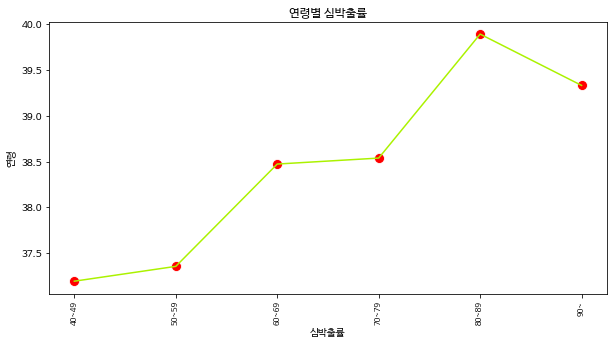

In [24]:
# 연령별 심박출률 그래프 그리기 
f, ax = plt.subplots(1, 1, figsize=(10,5))
sns.lineplot(x="age_spec", y="ejection_fraction", data=age_fraction_mean, color="#ABF200", ax=ax);
sns.scatterplot(x="age_spec", y="ejection_fraction", data=age_fraction_mean, s=100, color="#FF0000", ax=ax)
ax.set_title("연령별 심박출률")
ax.set_xlabel("심박출률")
ax.set_ylabel("연령")
plt.xticks(fontsize=8, rotation=90);



---



**(5) 크레아틴 키나제(혈청cpk) 검사 수치 컬럼 분석**<br> => 학습결과 중요도가 낮은 컬럼이다.

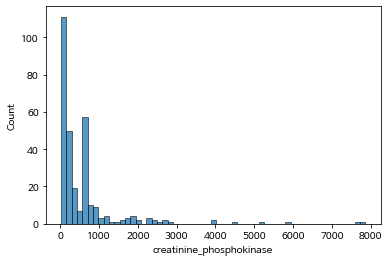

In [25]:
# 크레아틴 키나제 현황을 히스토그램으로 출력 => 수치가 8000 까지 존재한다.
# 그러나 도메인 지식으로 cpk 수치는 보통 1000을 잘 넘지 않으며, 과도한 수치의 경우 심근경색의 전조증상일 수 있다.
# 나의 예상: cpk와 심박출률의 연관성을 분석하는 것이 중요. => 심근 손상
sns.histplot(x='creatinine_phosphokinase', data=df)

In [26]:
# cpk를 수치별로 나누기 => for문을 이용하여 200단위로 나누기 2000 이상은 하나로 묶음. 
cpk_spec = []

for a in df.creatinine_phosphokinase:
    cpk = a // 200
    if cpk == 0:
        cpk_spec.append('0~199')
    elif cpk == 1:
        cpk_spec.append('200~399')
    elif cpk == 2:
        cpk_spec.append('400~599')
    elif cpk == 3:
        cpk_spec.append('600~799')
    elif cpk == 4:
        cpk_spec.append('800~999')
    elif cpk == 5:
        cpk_spec.append('1000~1199')
    elif cpk == 6:
        cpk_spec.append('1200~1399')
    elif cpk == 7:
        cpk_spec.append('1400~1599')
    elif cpk == 8:
        cpk_spec.append('1600~1799')
    elif cpk == 9:
        cpk_spec.append('1800~1999')
    else:
        cpk_spec.append('2000~')

In [27]:
# cpk_spec을 df의 cpk_spec 이라는 열로 추가
df['cpk_spec'] = cpk_spec
display(df.head(2),df.tail(2))

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_spec,cpk_spec
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,70~79,400~599
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,50~59,2000~


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_spec,cpk_spec
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0,40~49,2000~
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0,50~59,0~199


In [28]:
# creatinine_phosphokinase에 따른 심박출률 그래프 출력 => cpk_spec 컬럼과 ejection_fraction 컬럼만 추출
cpk_fraction = df[["cpk_spec", "ejection_fraction"]]
cpk_fraction["ejection_fraction"] = pd.to_numeric(cpk_fraction["ejection_fraction"])
display(cpk_fraction.head(2), cpk_fraction.tail(2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,cpk_spec,ejection_fraction
0,400~599,20
1,2000~,38


,cpk_spec,ejection_fraction
297,2000~,38
298,0~199,45


In [29]:
# cpk별 평균 구하기 => cpk_spec으로 정렬하고 ejection_fraction컬럼에는 평균함수(mean)을 적용(agg) => index초기화
cpk_fraction_mean = cpk_fraction.groupby("cpk_spec").agg({"ejection_fraction": "mean"}).reset_index()
display(cpk_fraction_mean.head(2),cpk_fraction_mean.tail(2))

,cpk_spec,ejection_fraction
0,0~199,39.3125
1,1000~1199,34.0000


,cpk_spec,ejection_fraction
9,600~799,40.733333
10,800~999,37.166667


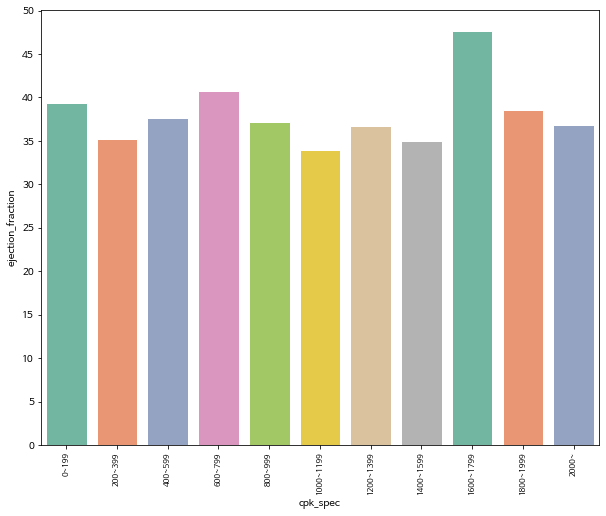

In [30]:
cpks = ['0~199', '200~399', '400~599', '600~799', '800~999', '1000~1199', '1200~1399', '1400~1599', '1600~1799', '1800~1999', '2000~']
# 그래프를 출력합니다.
plt.figure(figsize=(10,8))

import matplotlib.ticker as ticker
ax=plt.axes()
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))

sns.set(style="darkgrid")
ax = sns.barplot(x="cpk_spec", y="ejection_fraction",data=cpk_fraction_mean, palette="Set2", order = cpks)
plt.xticks(fontsize=8, rotation=90);

**나의 예상과 달리 CPK와 심박출률과의 관계 속에서 유의미한 데이터를 찾아낼 수 없었다.**



---



**(6) 심박출률 컬럼 분석**

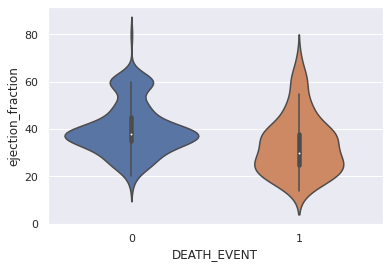

In [31]:
# 심박출률과 사망여부 (0: 생존, 1: 사망) - (1)
sns.violinplot(x="DEATH_EVENT", y="ejection_fraction", data=df)

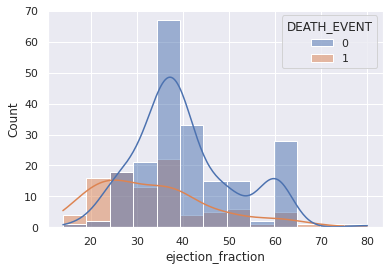

In [32]:
sns.histplot(x='ejection_fraction', data=df, bins=13, hue='DEATH_EVENT',kde=True)

In [33]:
# 심박출률과 사망여부 (0: 생존, 1: 사망) - (2)
# 심박출률를 나누기 => for문 이용 
fraction_spec = []

for a in df.ejection_fraction:
    fraction = a // 10
    if fraction == 1:
        fraction_spec.append('10~19')
    elif fraction >= 8:
        fraction_spec.append('80~')
    else: 
        fraction_spec.append('{}0~{}9'.format(int(fraction), int(fraction)))

In [34]:
# fraction_spec을 df의 fraction_spec 이라는 열로 추가
df['fraction_spec'] = fraction_spec
fraction_survived = df[["fraction_spec", "DEATH_EVENT"]]
fraction_survived["DEATH_EVENT"] = pd.to_numeric(fraction_survived["DEATH_EVENT"])
display(fraction_survived.head(2), fraction_survived.tail(2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,fraction_spec,DEATH_EVENT
0,20~29,1
1,30~39,1


,fraction_spec,DEATH_EVENT
297,30~39,0
298,40~49,0


In [35]:
# fraction별 평균 구하기 => fraction_spec으로 정렬하고 DEATH_EVENT컬럼에는 평균함수(mean)을 적용(agg) => index초기화
fraction_survived_mean = fraction_survived.groupby("fraction_spec").agg({"DEATH_EVENT": "mean"}).reset_index()
display(fraction_survived_mean.head(2),fraction_survived_mean.tail(2))

,fraction_spec,DEATH_EVENT
0,10~19,0.80000
1,20~29,0.62963


,fraction_spec,DEATH_EVENT
6,70~79,1.0
7,80~,0.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_

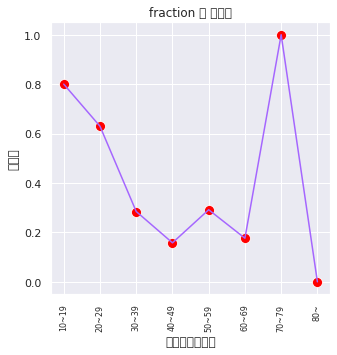

In [36]:
# fraction별 사망율 그래프 그리기 
f, ax = plt.subplots(1, 1, figsize=(10,5))
sns.lineplot(x="fraction_spec", y="DEATH_EVENT", data=fraction_survived_mean, color="#A566FF", ax=ax);
sns.scatterplot(x="fraction_spec", y="DEATH_EVENT", data=fraction_survived_mean, s=100, color="#FF0000", ax=ax)
ax.set_title("fraction-Death")
ax.set_xlabel("심박출률")
ax.set_ylabel("사망율")
plt.xticks(fontsize=8, rotation=90);

**심박출률이 낮을 수록 사망율이 높다.** <br>
=> 70~79 데이터가 하나뿐이라 약간 분석하기 애매하다.

---

**(7) 혈중 크레아틴 수치 분석하기**

In [37]:
# 혈중 크레아틴 분류
serum_creatinine_spec = []

for a in df.serum_creatinine:
    creatinine = a // 1
    if creatinine == 0:
        serum_creatinine_spec.append('0~0.9')
    elif creatinine >= 5:
        serum_creatinine_spec.append('5~')
    else: 
        serum_creatinine_spec.append('{}.0~{}.9'.format(int(creatinine), int(creatinine)))

In [38]:
# serum_creatinine_spec을 df의 serum_creatinine_spec 이라는 열로 추가
df['serum_creatinine_spec'] = serum_creatinine_spec
display(df.head(2),df.tail(2))

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_spec,cpk_spec,fraction_spec,serum_creatinine_spec
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,70~79,400~599,20~29,1.0~1.9
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,50~59,2000~,30~39,1.0~1.9


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_spec,cpk_spec,fraction_spec,serum_creatinine_spec
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0,40~49,2000~,30~39,1.0~1.9
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0,50~59,0~199,40~49,1.0~1.9


In [39]:
serum_creatinine_survived = df[["serum_creatinine_spec", "DEATH_EVENT"]]
serum_creatinine_survived["DEATH_EVENT"] = pd.to_numeric(serum_creatinine_survived["DEATH_EVENT"])
display(serum_creatinine_survived.head(2), serum_creatinine_survived.tail(2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,serum_creatinine_spec,DEATH_EVENT
0,1.0~1.9,1
1,1.0~1.9,1


,serum_creatinine_spec,DEATH_EVENT
297,1.0~1.9,0
298,1.0~1.9,0


In [40]:
# serum_creatinine별 평균 구하기 => fraction_spec으로 정렬하고 DEATH_EVENT컬럼에는 평균함수(mean)을 적용(agg) => index초기화
serum_creatinine_mean = serum_creatinine_survived.groupby("serum_creatinine_spec").agg({"DEATH_EVENT": "mean"}).reset_index()
display(serum_creatinine_mean)

,serum_creatinine_spec,DEATH_EVENT
0,0~0.9,0.111111
1,1.0~1.9,0.355191
2,2.0~2.9,0.631579
3,3.0~3.9,0.500000
4,4.0~4.9,1.000000
5,5~,0.666667


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_te

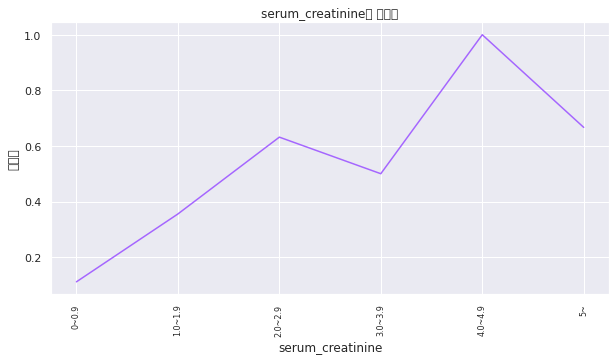

In [41]:
# serum_creatinine별 사망율 그래프 그리기 
f, ax = plt.subplots(1, 1, figsize=(10,5))
sns.lineplot(x="serum_creatinine_spec", y="DEATH_EVENT", data=serum_creatinine_mean, color="#A566FF", ax=ax);
ax.set_title("serum_creatinine_Death")
ax.set_xlabel("serum_creatinine")
ax.set_ylabel("사망율")
plt.xticks(fontsize=8, rotation=90);



---



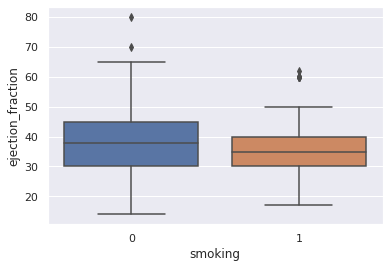

In [42]:
# 심박출률과 흡연여부 => 담배를 피는 경우 심박출률의 범위가 작다.
sns.boxplot(x="smoking", y="ejection_fraction", data=df)



---

